In [1]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv(
    "../data/processed/customer_churn_features.csv",
    parse_dates=['last_purchase_date']
)


In [4]:
# Calculate churn rate
churn_rate = customer_df['is_churned'].mean() * 100
churn_rate
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 19.78%


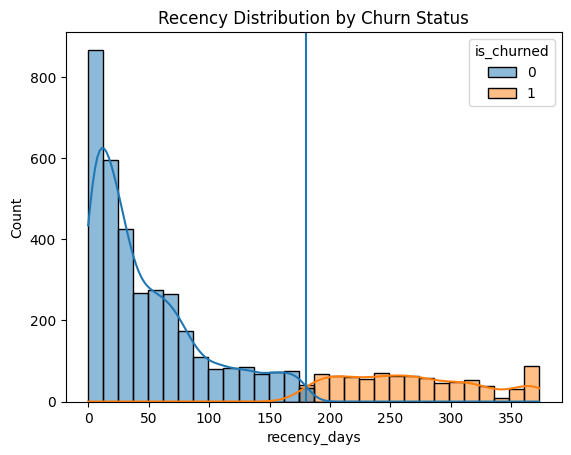

In [6]:


plt.figure()
sns.histplot(
    data=customer_df,
    x='recency_days',
    hue='is_churned',
    bins=30,
    kde=True
)
plt.axvline(180)
plt.title("Recency Distribution by Churn Status")
plt.show()


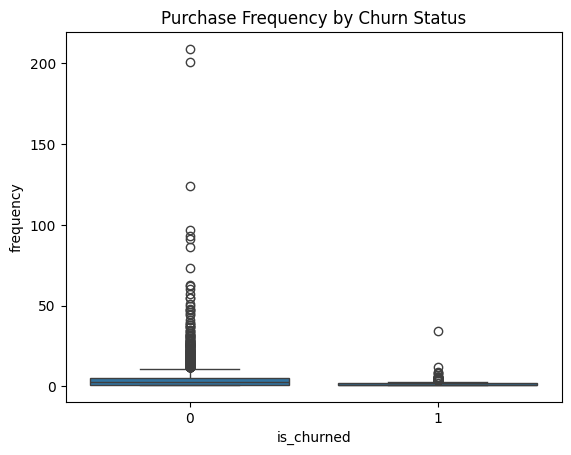

In [7]:

# view churn status based on purchase frequency
plt.figure()
sns.boxplot(
    data=customer_df,
    x='is_churned',
    y='frequency'
)
plt.title("Purchase Frequency by Churn Status")
plt.show()


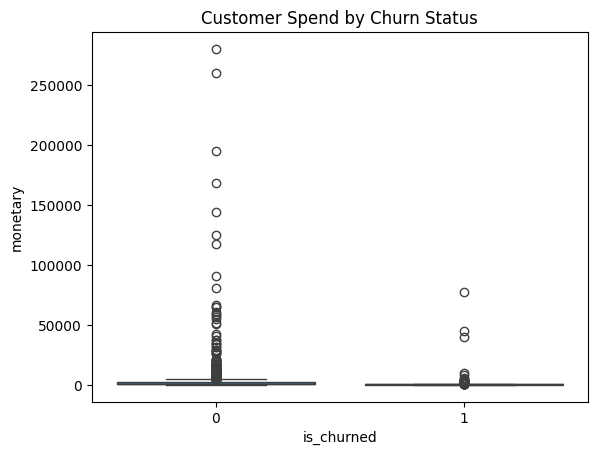

In [8]:
# view churn status based on monetary value
plt.figure()
sns.boxplot(
    data=customer_df,
    x='is_churned',
    y='monetary'
)
plt.title("Customer Spend by Churn Status")
plt.show()


In [9]:
customer_df.groupby('is_churned').agg(
    avg_recency=('recency_days', 'mean'),
    avg_frequency=('frequency', 'mean'),
    avg_monetary=('monetary', 'mean'),
    customer_count=('CustomerID', 'count')
)


,avg_recency,avg_frequency,avg_monetary,customer_count
is_churned,,,,
0,47.949138,4.954598,2401.115150,3480
1,268.324009,1.503497,647.467577,858


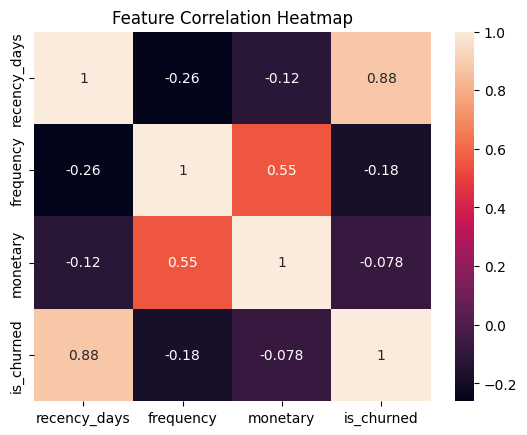

In [10]:
# This heatmap shows the correlation between different features
plt.figure()
sns.heatmap(
    customer_df[['recency_days', 'frequency', 'monetary', 'is_churned']].corr(),
    annot=True
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# This part helps us see which churned customers had high monetary value
avg_monetary = customer_df['monetary'].mean()

high_risk = customer_df[
    (customer_df['is_churned'] == 1) &
    (customer_df['monetary'] > avg_monetary)
]

print(f"Number of high-risk customers: {high_risk.shape[0]}")


Number of high-risk customers: 21


In [ ]:
# Observations
# 1. Customers who churn tend to have higher recency days, indicating they haven't purchased in a while.
# 2. Churned customers generally have lower purchase frequency and monetary value.
# 3. A subset of churned customers still represents high lifetime value, indicating missed retention opportunities


In [17]:
# Now let's look for the top 5% of churned customers

churned_customers = customer_df[customer_df['is_churned'] == 1]
len(churned_customers)

858

In [18]:
monetary_threshold = churned_customers['monetary'].quantile(0.95)
monetary_threshold


np.float64(1434.2444999999996)

In [19]:
top_5_percent_churned = churned_customers[
    churned_customers['monetary'] >= monetary_threshold
]


In [20]:
top_5_percent_churned = top_5_percent_churned[
    [
        'CustomerID',
        'recency_days',
        'frequency',
        'monetary'
    ]
].sort_values(by='monetary', ascending=False)

top_5_percent_churned.head(10)


,CustomerID,recency_days,frequency,monetary
0,12346,325,1,77183.60
2502,15749,234,3,44534.30
2011,15098,181,3,39916.50
196,12590,210,2,9864.26
566,13093,275,8,7832.47
4016,17850,371,34,5391.21
1958,15032,255,3,4959.10
332,12755,280,2,3811.95
2546,15808,305,4,3734.97
3570,17230,263,8,3638.41
